In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
from google.colab import files
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns


In [2]:

df = pd.read_excel("free_time_decision.xlsx")
df.head()

,weather,activity,decision
0,Sunny,Errands,Go Out
1,Rainy,Movie,Stay In
2,Rainy,Movie,Stay In
3,Sunny,Picnic,Go Out
4,Sunny,Errands,Go Out


In [3]:

df_encoded = df.copy()
df_encoded["weather"] = df_encoded["weather"].map({"Sunny":0, "Rainy":1})
df_encoded["activity"] = df_encoded["activity"].map({
    "Picnic":0, "Drink":1, "Errands":2, "Movie":3, "Stay Home":4
})
df_encoded["decision"] = df_encoded["decision"].map({"Stay In":0, "Go Out":1})


In [4]:

X = df_encoded[["weather", "activity"]]
y = df_encoded["decision"]

model = DecisionTreeClassifier(criterion="gini", max_depth=3, random_state=42)
model.fit(X, y)


DecisionTreeClassifier(max_depth=3, random_state=42)

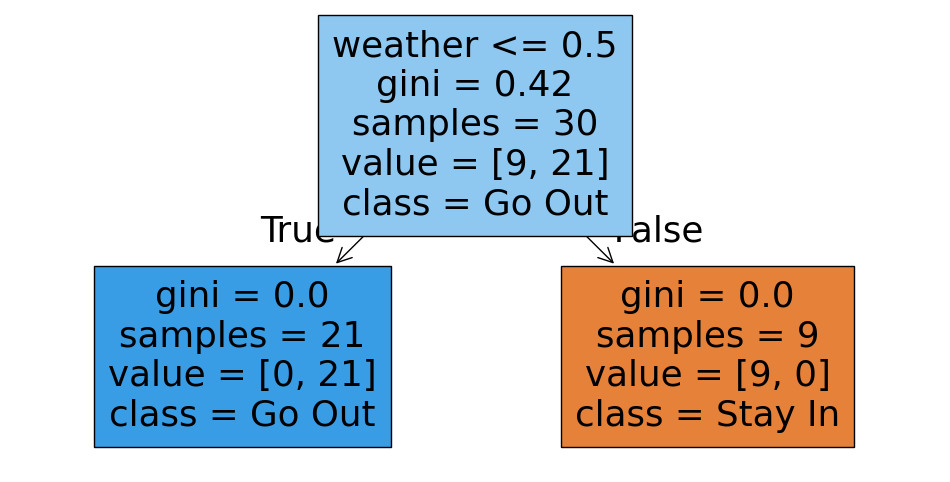

In [5]:

plt.figure(figsize=(12,6))
plot_tree(model, feature_names=["weather", "activity"], class_names=["Stay In", "Go Out"], filled=True)
plt.show()



In [6]:

y_pred = model.predict(X)
accuracy = accuracy_score(y, y_pred) * 100
print(f"\nAccuracy of Decision Tree: {accuracy:.2f}%")



Accuracy of Decision Tree: 100.00%


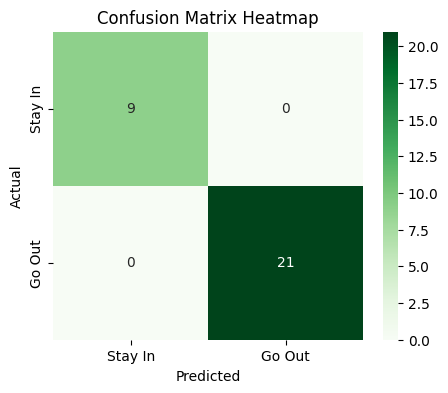

In [7]:

cm = confusion_matrix(y, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens", xticklabels=["Stay In", "Go Out"], yticklabels=["Stay In", "Go Out"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix Heatmap")
plt.show()